In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
air_Data = pd.read_excel('AirQualityUCI.xlsx', parse_dates=[["Date", "Time"]])
air_Data.head(5)

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
air_Data['Date_Time'] = pd.to_datetime(air_Data.Date_Time , format = '%d/%m/%Y %H.%M.%S')
new_Air_Data = air_Data.drop(['Date_Time'], axis=1)
new_Air_Data.index = air_Data.Date_Time

In [61]:
new_Air_Data.shape

(9357, 13)

In [62]:
new_Air_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 1023.4 KB


In [63]:
new_Air_Data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


<AxesSubplot:ylabel='Date_Time'>

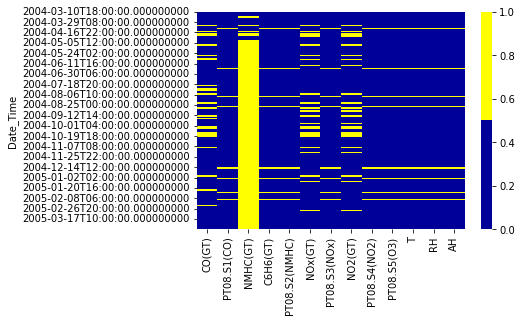

In [4]:
columns = new_Air_Data.columns[:]
colours = ['#000099', '#ffff00']
sb.heatmap(new_Air_Data[columns] == -200, cmap = sb.color_palette(colours))

In [5]:
new_Air_Data.drop("NMHC(GT)", axis= 1, inplace=True)

<AxesSubplot:ylabel='Date_Time'>

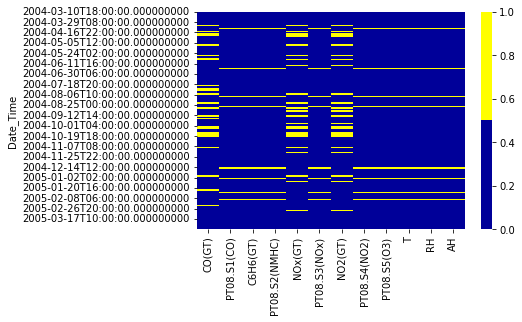

In [6]:
columns = new_Air_Data.columns[:]
colours = ['#000099', '#ffff00']
sb.heatmap(new_Air_Data[columns] == -200, cmap = sb.color_palette(colours))

In [7]:
cols = new_Air_Data.columns
for j in cols:
    for i in range(0,len(new_Air_Data)):
       if new_Air_Data[j][i] == -200:
           new_Air_Data[j][i] = new_Air_Data[j][i-1]

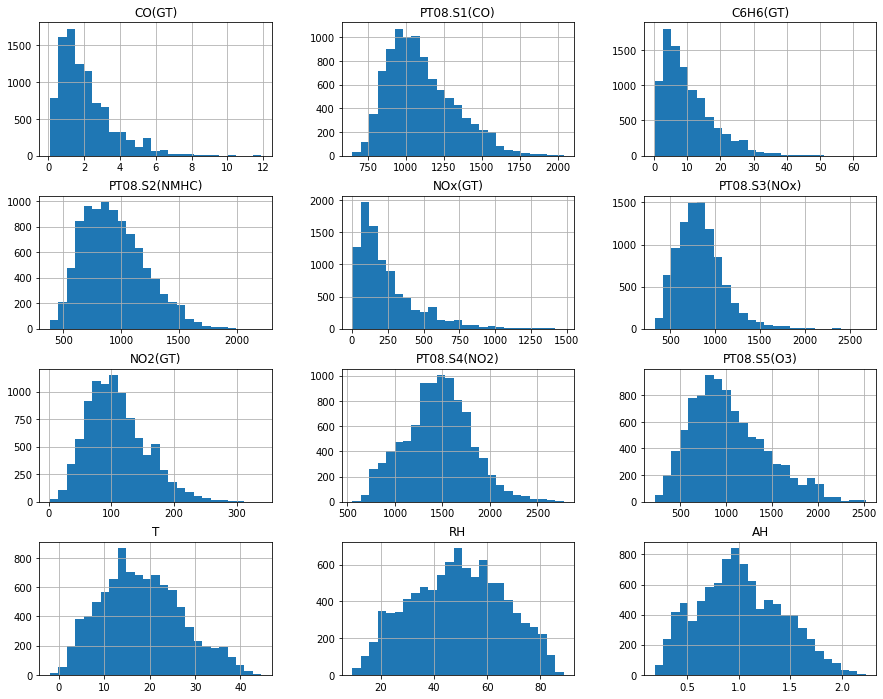

In [8]:
new_Air_Data.hist(figsize=(15, 12), bins=25)
plt.show()

1.395814077154125


C:\Users\manager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


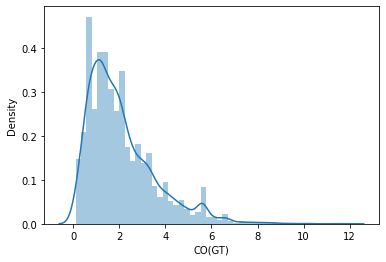

C:\Users\manager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.745577913471437


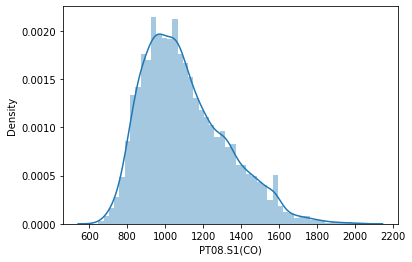

1.3331045184838053


C:\Users\manager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


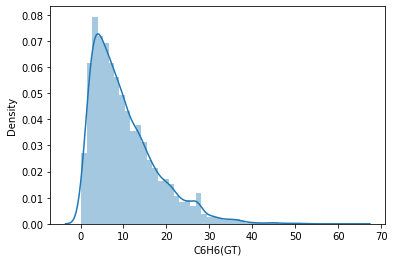

C:\Users\manager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.5682512201687746


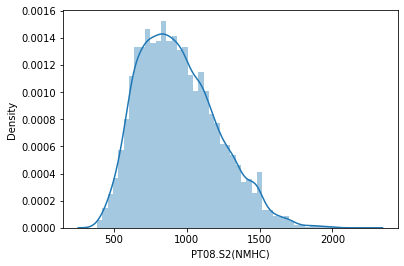

1.6926223078120373


C:\Users\manager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


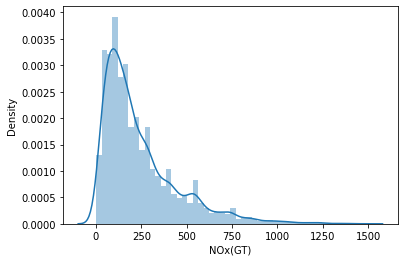

C:\Users\manager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.0760289302488133


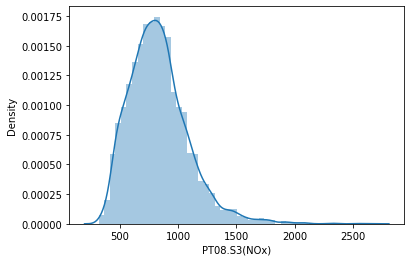

C:\Users\manager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.699818404584034


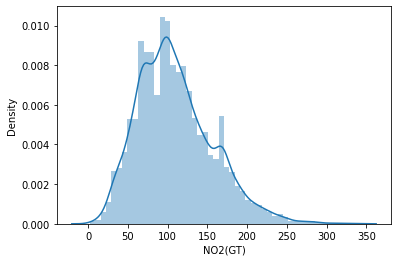

0.17354592137634373


C:\Users\manager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


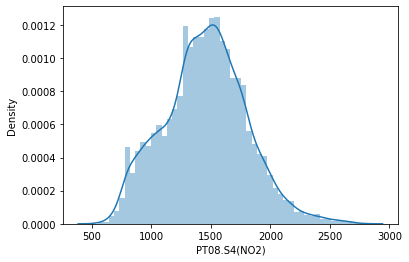

0.6623701759771208


C:\Users\manager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


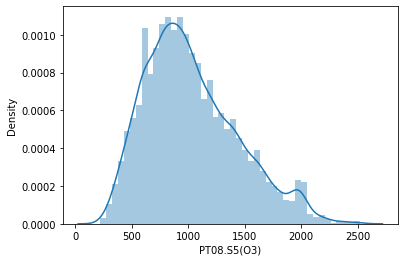

0.32450869308867414


C:\Users\manager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


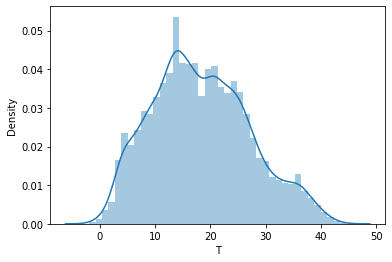

-0.0342722714966478


C:\Users\manager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


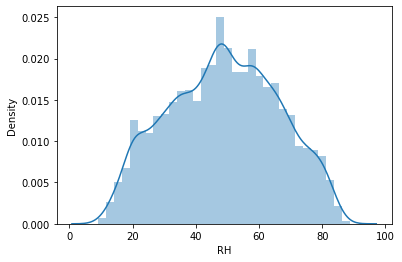

C:\Users\manager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.24805813491409956


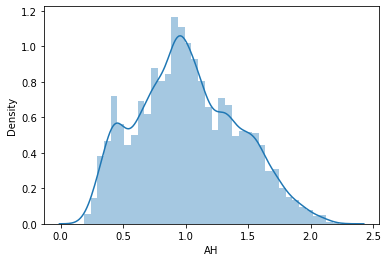

In [9]:
from scipy.stats import skew
for col in new_Air_Data:
    print(skew(new_Air_Data[col]))

    plt.figure()
    sb.distplot(new_Air_Data[col])
    plt.show()

In [87]:
corr = new_Air_Data.corr()
corr 

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041415,0.128351,-0.031377,0.029939,0.526450,-0.089981,0.671140,-0.073721,0.080316,-0.068952,-0.048231,-0.045892
PT08.S1(CO),0.041415,1.000000,0.170009,0.852659,0.933101,0.278029,0.086931,0.154058,0.845133,0.892436,0.754806,0.745344,0.764866
NMHC(GT),0.128351,0.170009,1.000000,0.037329,0.110097,-0.004413,0.048832,0.103345,0.162689,0.101189,-0.000008,0.008288,0.012500
C6H6(GT),-0.031377,0.852659,0.037329,1.000000,0.767401,-0.001163,0.512154,-0.010971,0.774649,0.641306,0.971370,0.925068,0.984556
PT08.S2(NMHC),0.029939,0.933101,0.110097,0.767401,1.000000,0.331331,-0.073748,0.176569,0.874761,0.909909,0.668984,0.585775,0.646535
NOx(GT),0.526450,0.278029,-0.004413,-0.001163,0.331331,1.000000,-0.436083,0.817138,0.035580,0.461916,-0.138457,-0.053008,-0.095841
PT08.S3(NOx),-0.089981,0.086931,0.048832,0.512154,-0.073748,-0.436083,1.000000,-0.256217,0.122672,-0.208935,0.588061,0.573513,0.621576
NO2(GT),0.671140,0.154058,0.103345,-0.010971,0.176569,0.817138,-0.256217,1.000000,-0.022092,0.253469,-0.084084,-0.081300,-0.060423
PT08.S4(NO2),-0.073721,0.845133,0.162689,0.774649,0.874761,0.035580,0.122672,-0.022092,1.000000,0.723670,0.755053,0.640685,0.691889
PT08.S5(O3),0.080316,0.892436,0.101189,0.641306,0.909909,0.461916,-0.208935,0.253469,0.723670,1.000000,0.503659,0.524922,0.519432


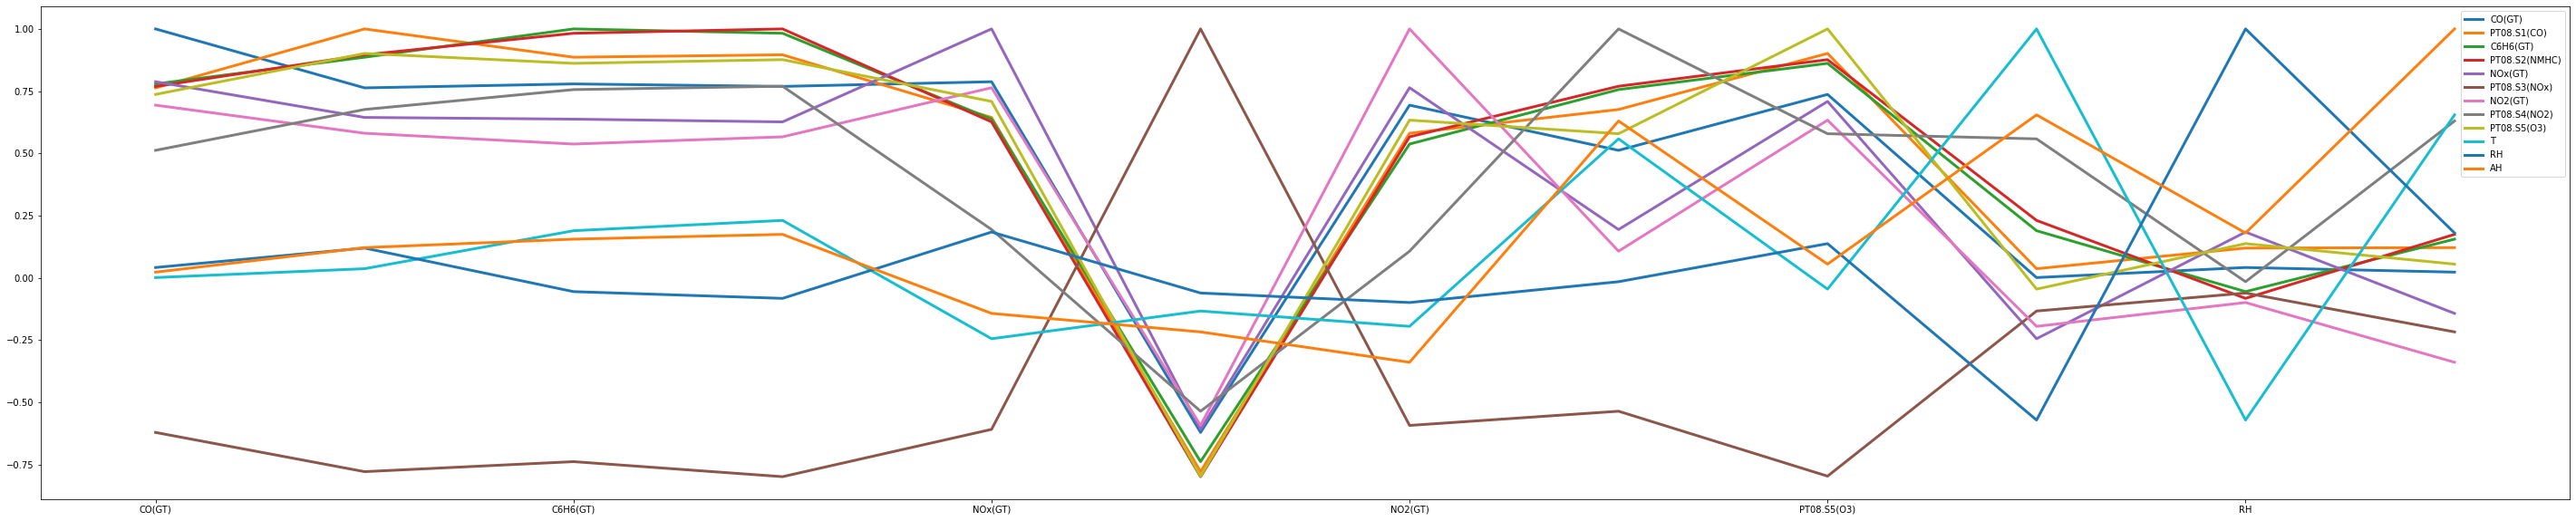

In [71]:
corr.plot(figsize=(50, 10), linewidth = 3).legend(loc="upper right")


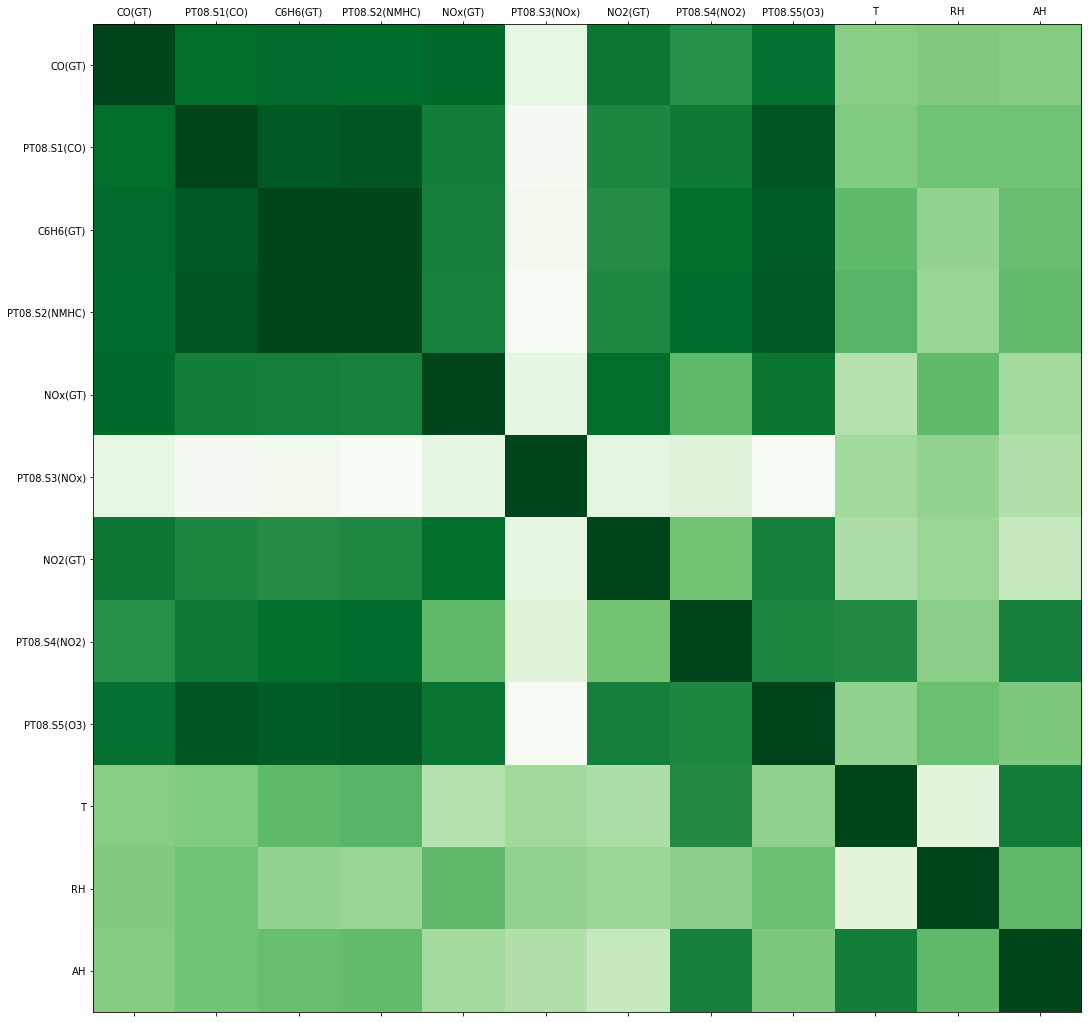

In [72]:
labels = corr.columns

fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(222)
ax.matshow(corr, cmap=plt.cm.Greens)  
ax.set_xticks(np.arange(len(labels))) 
ax.set_yticks(np.arange(len(labels)))  
ax.set_xticklabels(labels) 
ax.set_yticklabels(labels) 

plt.show()

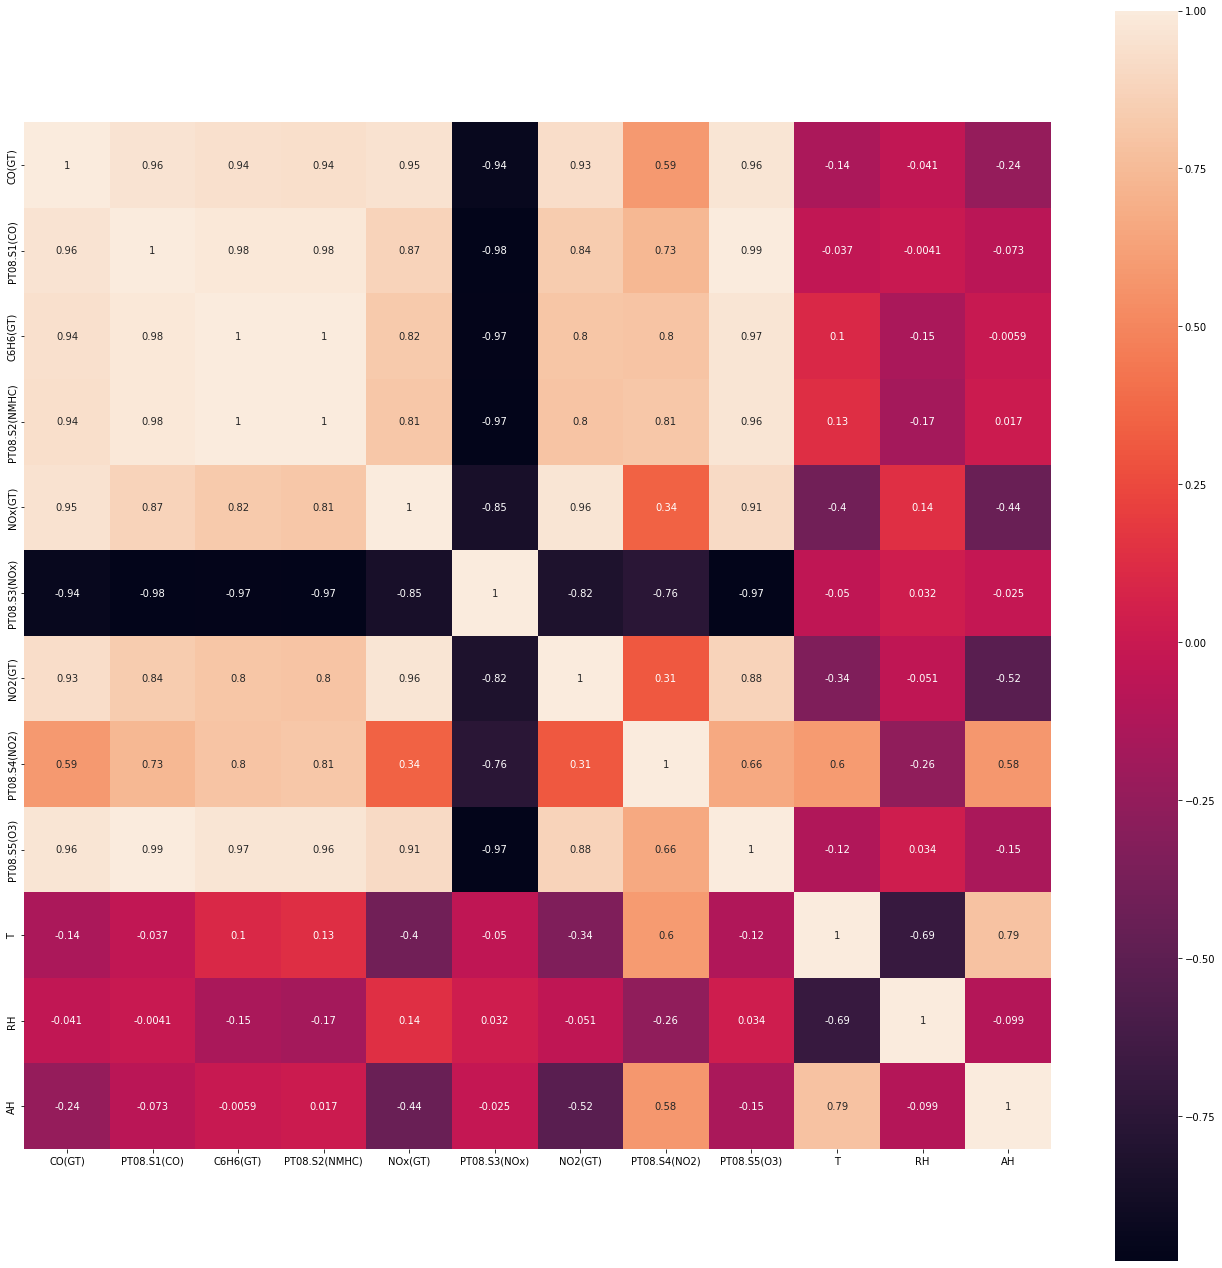

In [73]:
plt.figure(figsize=(23,23))
heat = sb.heatmap(corr.corr(), vmax=1, square=True, annot=True)

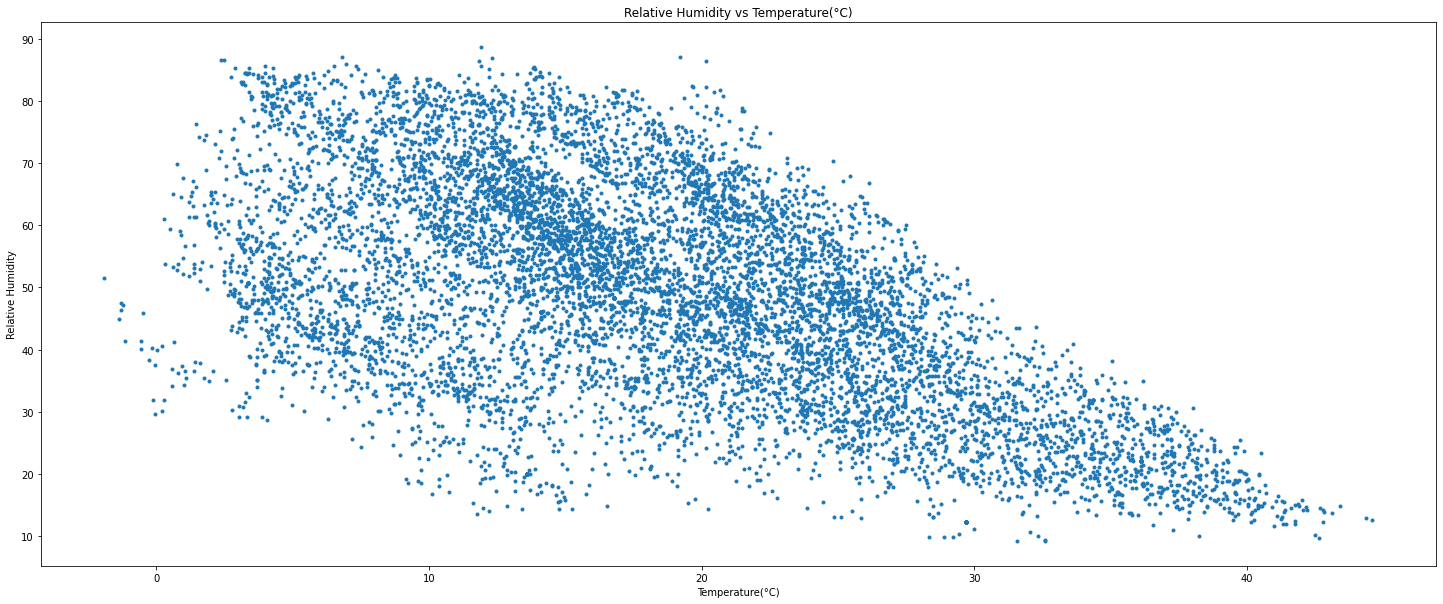

In [74]:
plt.figure(figsize=(25,10))
plt.xlabel('Temperature(°C)')
plt.ylabel('Relative Humidity')
plt.title("Relative Humidity vs Temperature(°C)")
plt.scatter(new_Air_Data['T'], new_Air_Data['RH'], marker='.', aa=True)

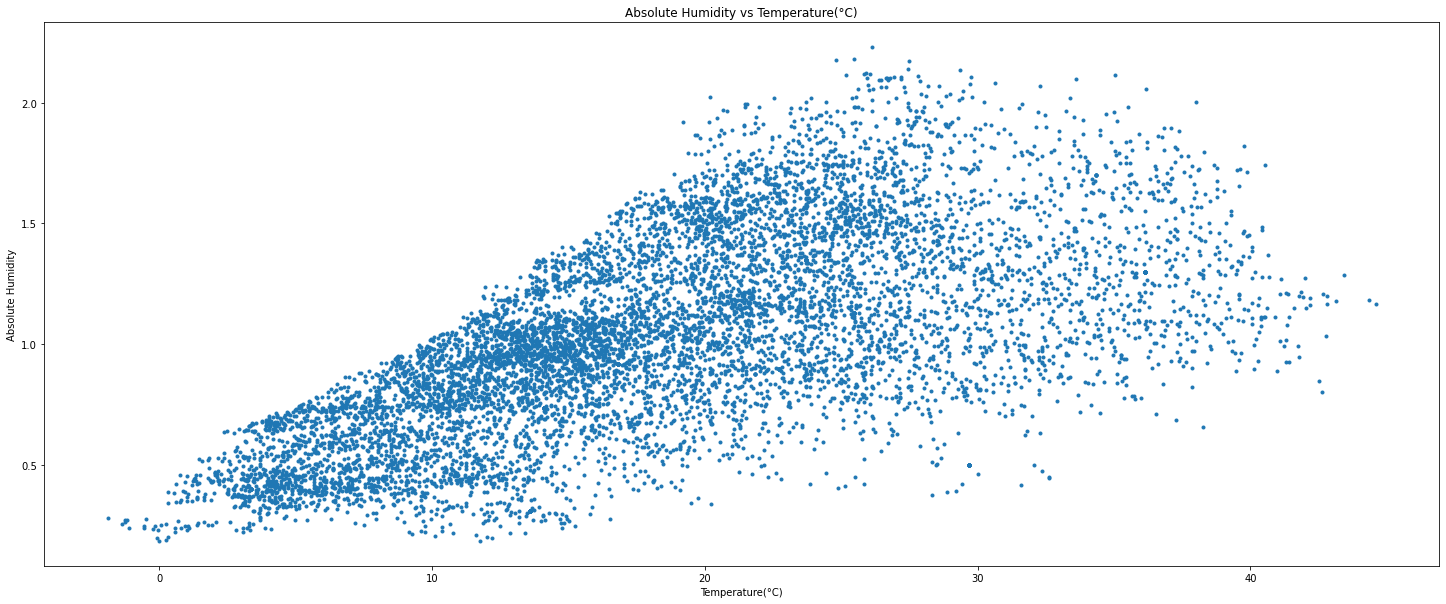

In [75]:
plt.figure(figsize=(25,10))
plt.xlabel('Temperature(°C)')
plt.ylabel('Absolute Humidity')
plt.title("Absolute Humidity vs Temperature(°C)")
plt.scatter(new_Air_Data['T'], new_Air_Data['AH'], marker='.', aa=True)

In [88]:
from sklearn.model_selection import train_test_split
X=new_Air_Data[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)',	'PT08.S2(NMHC)',	'NOx(GT)',	'PT08.S3(NOx)',	'NO2(GT)',	'PT08.S4(NO2)',	'PT08.S5(O3)',	'T']]
y=new_Air_Data[['RH','AH']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [89]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [90]:
y_pred=reg.predict(X_test)
y_pred

array([[  55.66734708,   -0.95344975],
       [  53.21401942,    0.79985822],
       [  39.1038334 ,   -0.58950893],
       ...,
       [  56.07472345,    0.69436109],
       [-201.43457317, -199.65611649],
       [  57.3411713 ,   -0.32487829]])

In [79]:
y_test

,RH,AH
Date_Time,,
2005-03-18 07:00:00,66.675000,0.694271
2005-03-19 01:00:00,68.325001,0.931445
2004-09-21 05:00:00,63.025000,1.358170
2005-03-11 08:00:00,58.575000,0.491528
2004-09-14 08:00:00,55.450000,1.555924
...,...,...
2005-01-18 09:00:00,56.825000,0.476843
2005-03-27 01:00:00,63.775000,1.189606
2004-05-10 03:00:00,63.174999,0.995210


In [80]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8023514310340176


In [83]:
X=new_Air_Data[['CO(GT)', 'PT08.S1(CO)',	'C6H6(GT)',	'PT08.S2(NMHC)',	'NOx(GT)',	'PT08.S3(NOx)',	'NO2(GT)',	'PT08.S4(NO2)',	'PT08.S5(O3)',	'T']]
y_pred_all=reg.predict(X)
new_Air_Data['RH_pred']=y_pred_all[:,0]
new_Air_Data['AH_pred']=y_pred_all[:,1]
new_Air_Data

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,RH_pred,AH_pred
Date_Time,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,54.594371,0.778784
2004-03-10 19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,51.105688,0.671530
2004-03-10 20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,54.470599,0.652634
2004-03-10 21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,59.470358,0.728592
2004-03-10 22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,58.572494,0.727560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,35.248452,0.915664
2005-04-04 11:00:00,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,23.524258,0.806458
2005-04-04 12:00:00,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,11.881970,0.697671


In [91]:
reg.score(X_train, y_train)

0.9816309175256137